# CREDIT CARD FRAUD DETECTION

## Group Members:
1. **Malvis Kagiri - Scrum Master**
2. **Maryann Maina**
3. **Flavian Miano**
4. **Keith Madegwa**
5. **Patience Anono**
6. **Wema Mothoni**


## 1. INTRODUCTION  

Credit card fraud is defined as a fraudulent transaction (payment) that is made using a credit or debit card by an unauthorized user.Credit cards are now the most preferred way for customers to transact either offline or online, due to the advancement in communication and electronic commerce systems.

### 1.1. BUSINESS UNDERSTANDING  

Due to the advancement in communication and electronic commerce systems, proliferation and increase in the use of services such as e-commerce, tap and pay systems, online bills payment systems etc. As a consequence, fraudsters have also increased activities to attack transactions that are made using credit cards.Fraud associated with  transactions has increased significantly and fraud detection has become a challenging task because of the constantly changing nature and patterns of the fraudulent transactions.It is therefore crucial to implement effective and efficient mechanisms that can detect credit card fraud to protect users from financial loss.


### a).Problem statement  

Due to the increase in fraudulent activities it  has become essential for financial institutions and businesses to develop advanced fraud detection techniques to counter the threat of fraudulent credit card transactions and identity theft and keep losses to a minimum

### b). Main Objective

To develop an accurate and reliable machine learning model that can detect fraudulent activities in real-time

### c).Specific Objectives
- To identify and analyze patterns and correlations in the dataset to better understand the characteristics of fraudulent transactions.
- To check time of the day when most frauds are conducted and ages that are prone to credit card Frauds.
- To contribute to the development of more accurate and effective fraud detection models for financial transactions.  
- To provide a useful tool for individuals and organizations to detect and prevent fraudulent financial transactions, thereby minimizing financial losses and improving financial security.  
- To compare different ML models predictions to achieve highest accuracy.  
- Advice the Company on best the strategy.

### 1.2. DATA UNDERSTANDING  

The dataset utilized for this project was obtained from [Kaggle](https://www.kaggle.com/datasets/kartik2112/fraud-detection), containing simulated financial transactions based on a genuine financial transactions dataset. It comprised 23 rows and columns, with the target variable being a binary indicator showing whether the transaction was fraudulent (1) or not (0). An exploratory data analysis was performed on the training data to identify features that were correlated with fraudulent activities. Models were then developed using those features, and their predictive effectiveness was evaluated. The features present in the dataset were analyzed.


- Index - Unique Identifier for each row
- Trans_date_trans_time - Transaction DateTime
- Cc_num - Credit Card Number of Customer
- Merchant - Merchant Name
- Category - Category of Merchant
- Amt - Amount of Transaction
- First - First Name of Credit Card Holder
- Last - Last Name of Credit Card Holder
- Gender - Gender of Credit Card Holder
- Street - Street Address of Credit Card Holder
- City - City of Credit Card Holder
- State - State of Credit Card Holder
- Zip - Zip of Credit Card Holder
- Lat - Latitude Location of Credit Card Holder
- Long - Longitude Location of Credit Card Holder
- City_pop - Credit Card Holder's City Population
- Job -Job of Credit Card Holder
- Dob - Date of Birth of Credit Card Holder
- Rans_num - Transaction Number
- Unix_time - UNIX Time of transaction
- Merch_lat - Latitude Location of Merchant
- Merch_long - Longitude Location of Merchant
- Is_fraud  - Fraud Flag <--- Target Class
- Index Unique - Identifier for each row 
- Trans_date_trans_time - Transaction DateTime 


### 1.3. METRIC OF SUCCESS 

* The project's success will be gauged based on achieving an ROC score of 85 and recall rate of 85 for the developed machine learning model. 
* The model must be highly effective in accurately categorizing fraudulent transactions while minimizing false positives and false negatives.

### 1.4. REQUIREMENTS

1. Data collection from Kaggle dataset.
2. Data preprocessing and feature engineering.
3. Exploratory data analysis to gain insights into the dataset.
4. Model selection and training, including logistic regression, decision trees, and random forests.
5. Model evaluation and fine-tuning of the best-performing model.
6. Comparison of the final model with other models developed in the project.

## 2. Reading the Data

In [1]:
#import relevant libraries
import pickle
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

### 2.1.Loading dataset

In [2]:
# #Unzip the imdb file
# shutil.unpack_archive("fraudTrain.zip")
# #Unzip the imdb file
# shutil.unpack_archive("fraudTest.zip")

In [3]:
# Loading the Data from the source 
credits_df = pd.read_csv('fraudTrain.csv')
credits_test_df = pd.read_csv('fraudTest.csv')
pd.set_option('display.max_columns', None)

## 3. Checking the Data

In [4]:
#previewing the top of the dataset
credits_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# Previewing the bottom of our train dataset
credits_df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [6]:
# Previewing the top of our test dataset
credits_test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
# Previewing the bottom of our test dataset
credits_test_df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [8]:
#Checking no.of records in the train dataset
print(f'The train set has {credits_df.shape} rows and columns')

The train set has (1296675, 23) rows and columns


In [9]:
#Checking the shape of the test dataset
print(f'The test set has {credits_test_df.shape} rows and columns')

The test set has (555719, 23) rows and columns


In [10]:
# Checking whether each column has an appropriate datatype in the train dataset
credits_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [11]:
# Checking whether each column has an appropriate datatype in the test dataset
credits_test_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [12]:
# Checking the info in the train dataset
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [13]:
# Describing the data
credits_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [14]:
# Checking the info in the test dataset
credits_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [15]:
# Describing the data for the test dataset
credits_test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [16]:
# Value counts for each column in train dataset
for col in credits_df.columns[1:]:
    print('\n' + col + '\n')
    print(credits_df[col].value_counts())


trans_date_trans_time

2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64

cc_num

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

merchant

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
frau

In [17]:
# Value counts for each column in test dataset
for col in credits_test_df.columns[1:]:
    print('\n' + col + '\n')
    print(credits_test_df[col].value_counts())


trans_date_trans_time

2020-12-19 16:02:22    4
2020-12-13 17:53:47    4
2020-12-17 20:36:39    4
2020-10-05 19:37:49    4
2020-12-27 01:22:37    3
                      ..
2020-08-25 13:15:57    1
2020-08-25 13:15:37    1
2020-08-25 13:15:22    1
2020-08-25 13:15:12    1
2020-12-31 23:59:34    1
Name: trans_date_trans_time, Length: 544760, dtype: int64

cc_num

6538441737335434       1474
4586810168620942       1466
4745996322265          1462
4587657402165341815    1458
2242542703101233       1428
                       ... 
4883407061576             9
4087542780207162          9
3540416671210051          8
4352307151555405069       7
4295296907373             6
Name: cc_num, Length: 924, dtype: int64

merchant

fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 

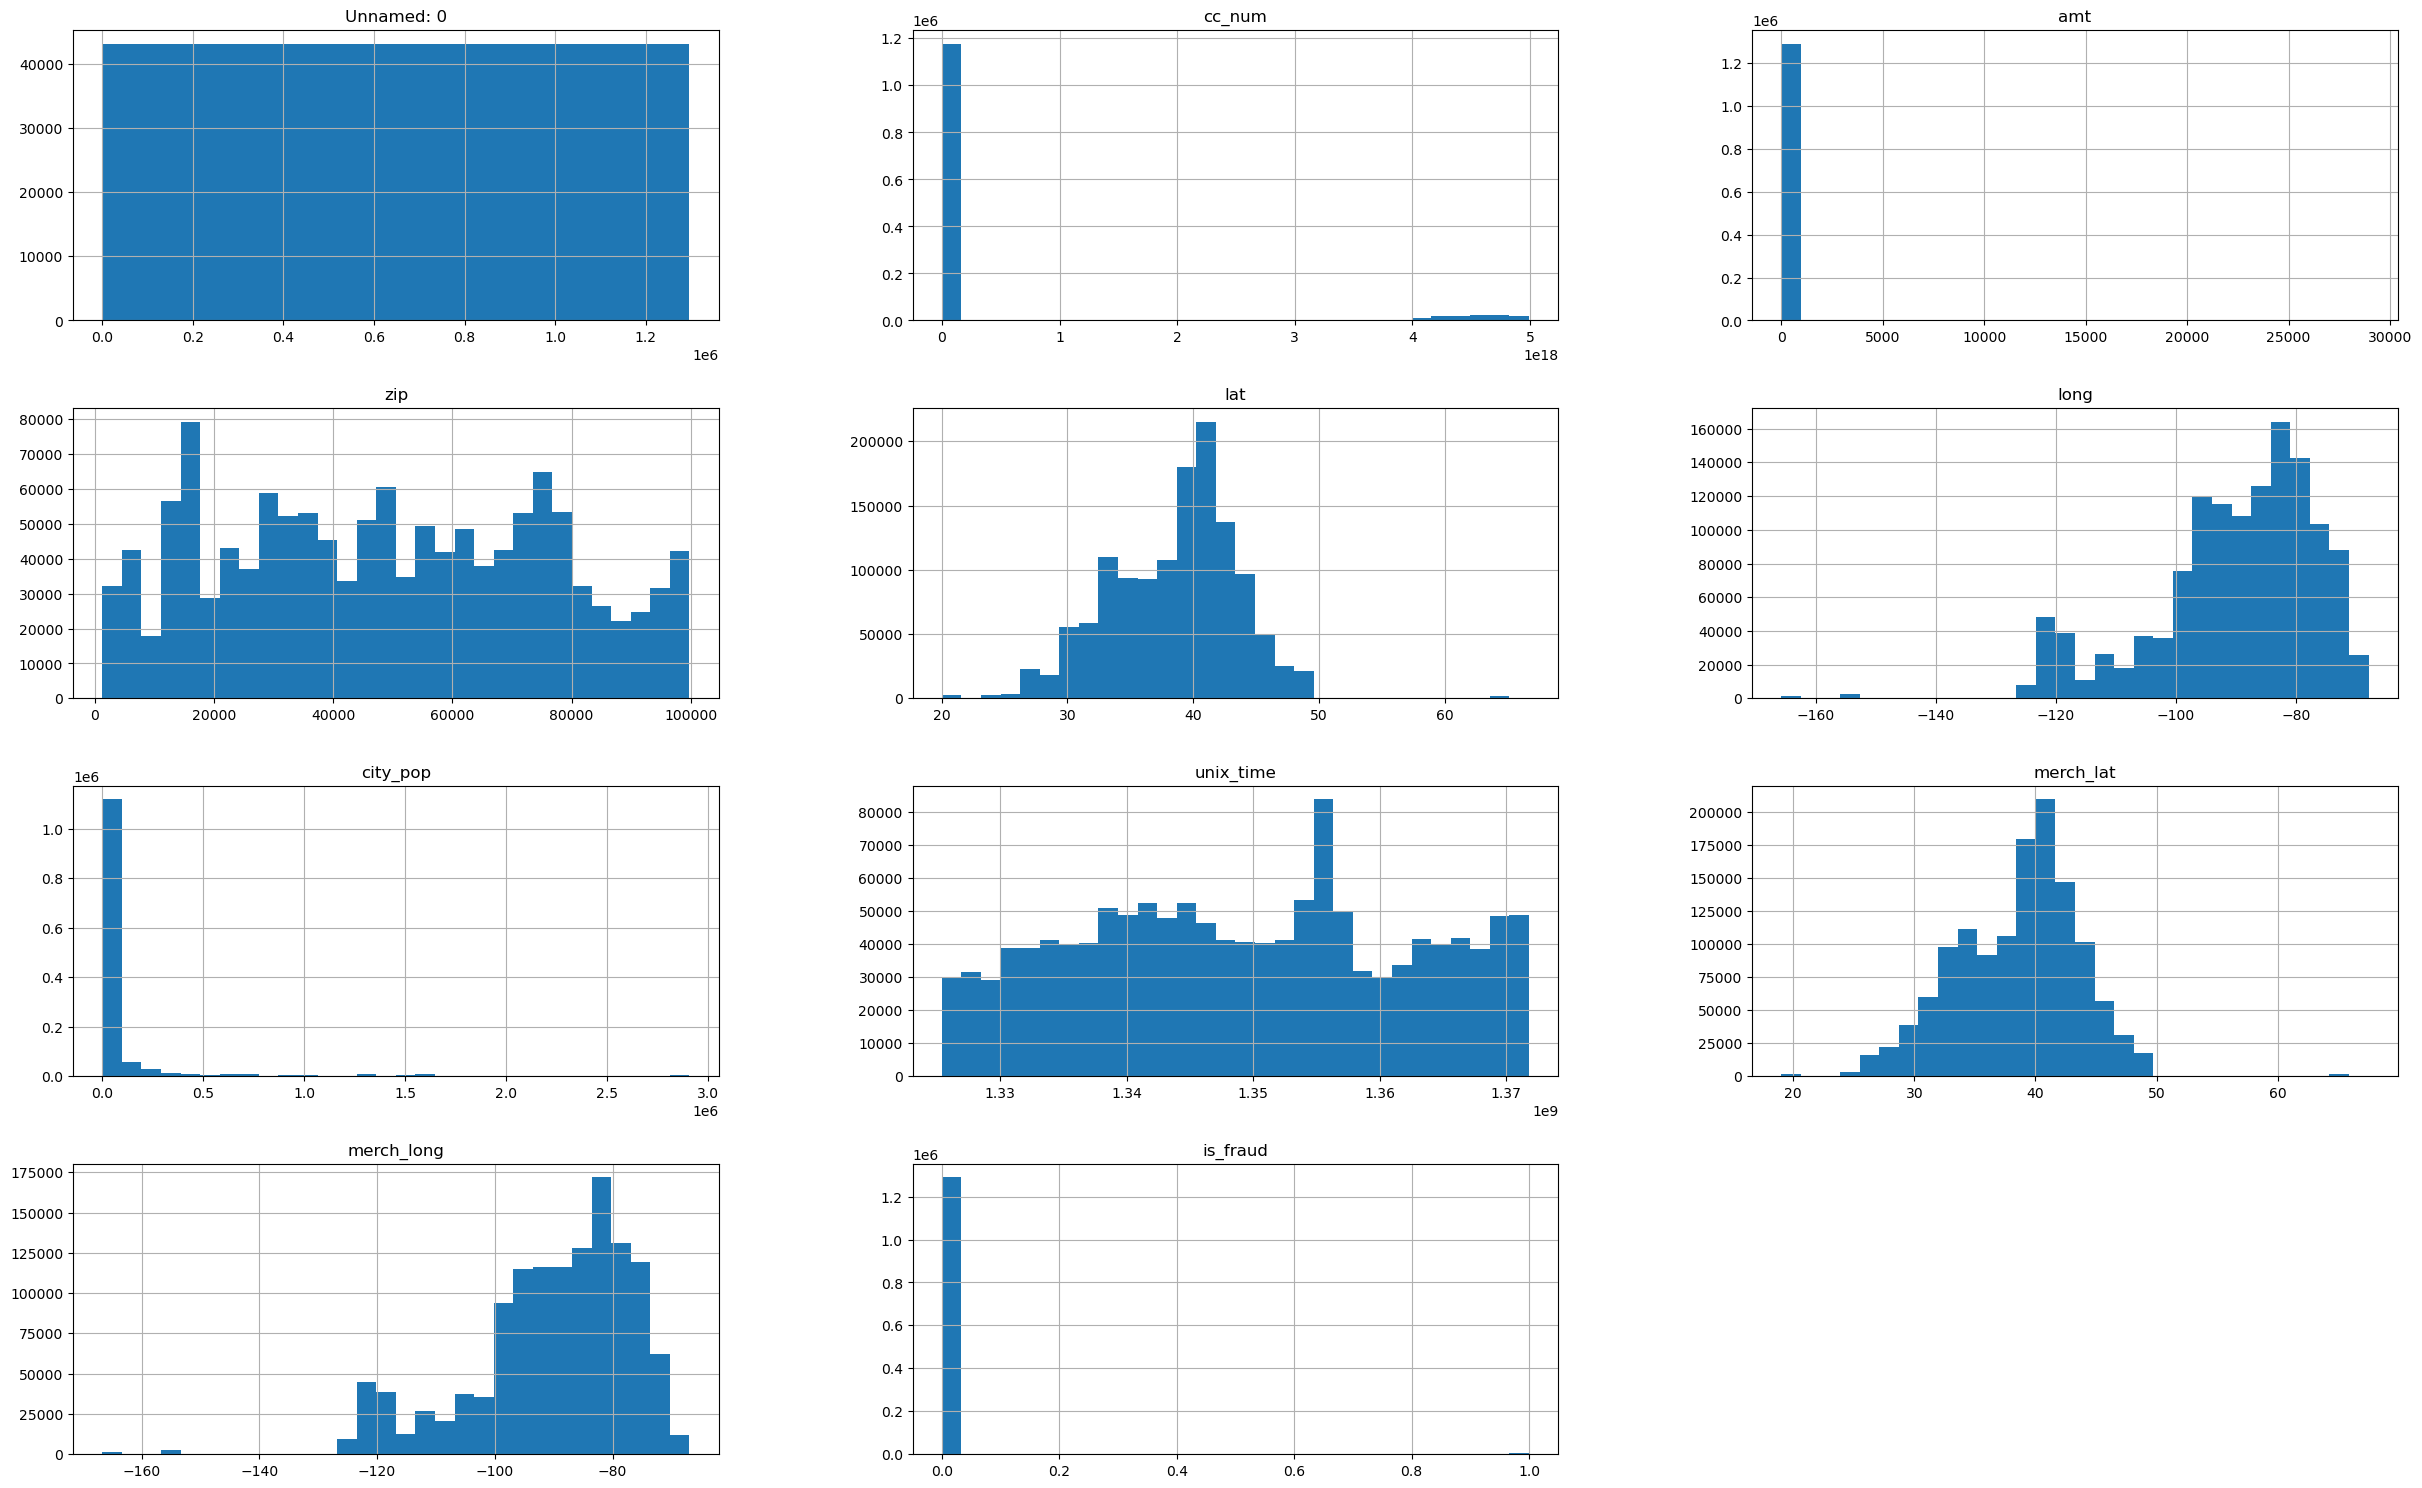

In [18]:
credits_df.hist(bins=30, figsize=(30, 18.5))
plt.show()

It is observed that the histograms for most of the variables appear to be symmetrical around the mean, and thus do not necessitate feature transformation to make them more symmetrical.

## 4) Tidying the Dataset

In [19]:
# Identifying the Missing Data
credits_test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [20]:
# Identifying the Missing Data
credits_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [21]:
#Checking for duplicates in the train dataset
credits_df.duplicated().sum()

0

In [22]:
# Checking for duplicates
credits_test_df.duplicated().sum()

0

There were no duplicates nor missing values in both the train and test datasets.

In [23]:
# Dropping the unnamed column
credits_df.drop(credits_df.columns[0], axis=1, inplace=True)
credits_test_df.drop(credits_test_df.columns[0], axis=1, inplace=True)

In [24]:
# Converting date columns to datetime format

credits_df['trans_date_trans_time']=pd.to_datetime(credits_df['trans_date_trans_time'])
credits_df['trans_date']=credits_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
credits_df['trans_date']=pd.to_datetime(credits_df['trans_date'])
credits_df['dob']=pd.to_datetime(credits_df['dob'])

credits_test_df['trans_date_trans_time']=pd.to_datetime(credits_test_df['trans_date_trans_time'])
credits_test_df['trans_date']=credits_test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
credits_test_df['trans_date']=pd.to_datetime(credits_test_df['trans_date'])
credits_test_df['dob']=pd.to_datetime(credits_test_df['dob'])



In [25]:
# Separate date and time components into separate columns
credits_df['trans_time'] = credits_df['trans_date_trans_time'].dt.time
credits_test_df['trans_time'] = credits_test_df['trans_date_trans_time'].dt.time
credits_df['hour'] = credits_df['trans_date_trans_time'].dt.hour
credits_test_df['hour'] = credits_test_df['trans_date_trans_time'].dt.hour

In [26]:
#dropping the trans_date_trans_time column
credits_df = credits_df.drop(columns='trans_date_trans_time')
credits_test_df = credits_test_df.drop(columns='trans_date_trans_time')

## 5) Exploratory Analysis  
To gain a better understanding of our dataset, the distribution of individual features was analyzed. The following questions were answered:

- The distribution of fraudulent transactions was examined.
- Statistical measures for the amount column were computed for both fraudulent and legitimate transactions.
- The total percentage of fraudulent transactions was determined.
- General trends in the amounts for credit card fraud transactions were identified.
- Relationships between transactions and other attributes were investigated.
- Attributes that exhibited the highest correlation with fraudulent transactions were identified.

In [27]:
credit_df = credits_df.copy()

### 5.1) Distribution of Transactions

Text(0, 0.5, 'Count')

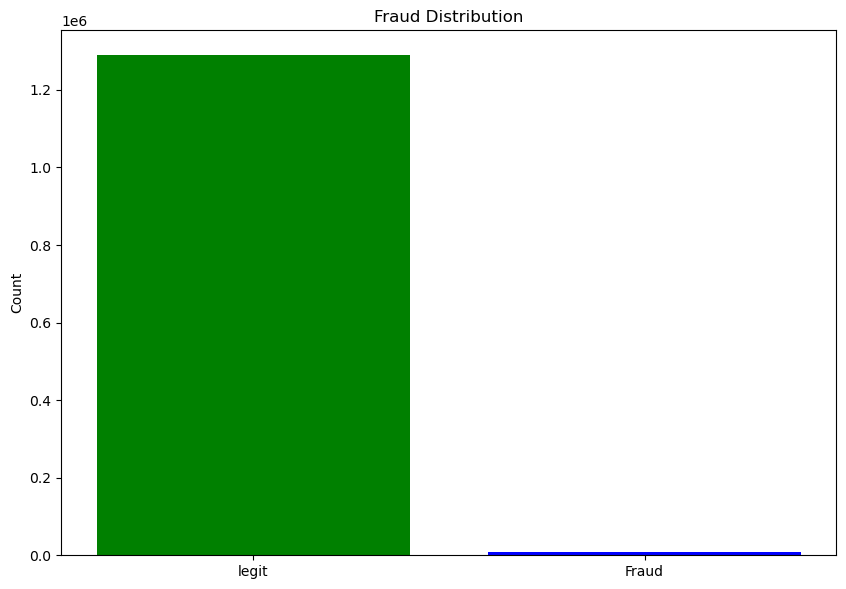

In [28]:
classes_train=credit_df['is_fraud'].value_counts()
normal_share_train=classes_train[0]/credit_df['is_fraud'].count()
fraud_share_train=classes_train[1]/credit_df['is_fraud'].count()

fig = plt.figure(figsize =(10, 15))
plt.subplot(2,1,1)
plt.bar(['legit','Fraud'], classes_train, color=['green','b'])
plt.title('Fraud Distribution')
plt.ylabel('Count')

It is observed that this dataset is highly imbalanced, as evidenced by the countplot, with the majority class label '0' representing legitimate transactions and the minority class label '1' representing fraudulent transactions.

In [29]:
percentage_Fraud = 100 * credit_df[credit_df.is_fraud == 1].shape[0]/credit_df[credit_df.is_fraud == 0].shape[0]
print('The percentage of fraudulent transactions is : %.2f percent' % percentage_Fraud )

The percentage of fraudulent transactions is : 0.58 percent


### 5.2) The statistical measures in the amount column for both fraud and legit transactions.

In [30]:
#separating the data for analysis
legit = credit_df[credit_df.is_fraud == 0]
fraud = credit_df[credit_df.is_fraud == 1]

In [31]:
print(legit.shape)
print(fraud.shape)

(1289169, 24)
(7506, 24)


In [32]:
legit.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [33]:
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

It was observed that the average amount for fraudulent transactions is 531, which is higher compared to legitimate transactions. The mean transaction amount for fraudulent activities was found to be significantly larger than that of legitimate activities.

### 5.2.1) Comparison values of all attributes  for both legit and fraudulent transactions

In [34]:
credit_df.groupby('is_fraud').mean()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,hour
is_fraud,,,,,,,,,,
0,4.172901e+17,67.667110,48805.107481,38.536888,-90.228142,88775.228137,1.349249e+09,38.536659,-90.228274,12.797679
1,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,97276.763256,1.348389e+09,38.653901,-89.915808,14.037836


### 5.3) Total percentage of both fraudulent and legit transactions

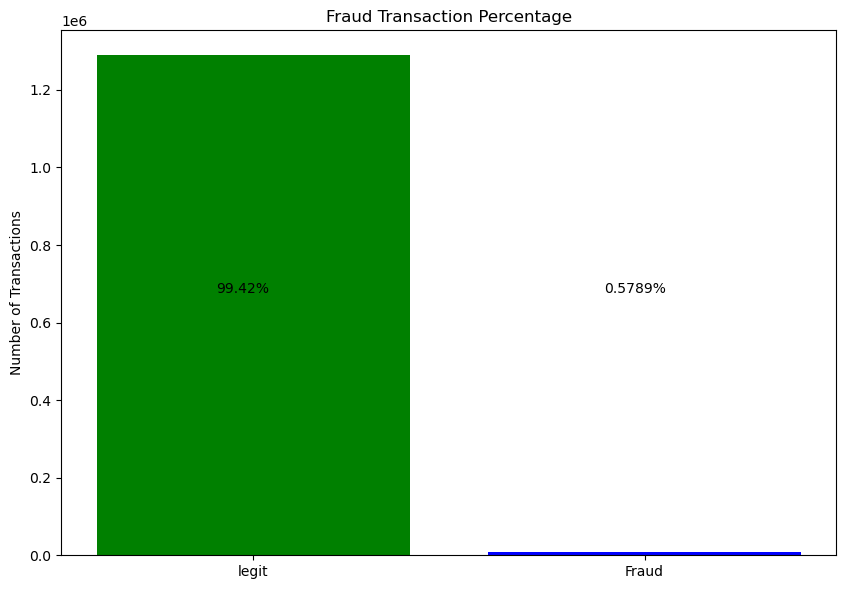

In [35]:
classes_train=credit_df['is_fraud'].value_counts()
normal_share_train=classes_train[0]/credit_df['is_fraud'].count()*100
fraud_share_train=classes_train[1]/credit_df['is_fraud'].count()*100

fig = plt.figure(figsize =(10, 15))
plt.subplot(2,1,1)
plt.bar(['legit','Fraud'], classes_train, color=['green','b'])
plt.title('Fraud Transaction Percentage')
plt.ylabel('Number of Transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')
plt.show()

The percentage of normal (legitimate) transactions is higher than that of fraudulent transactions.

### 5.4) Which  gender transacts most using credit card

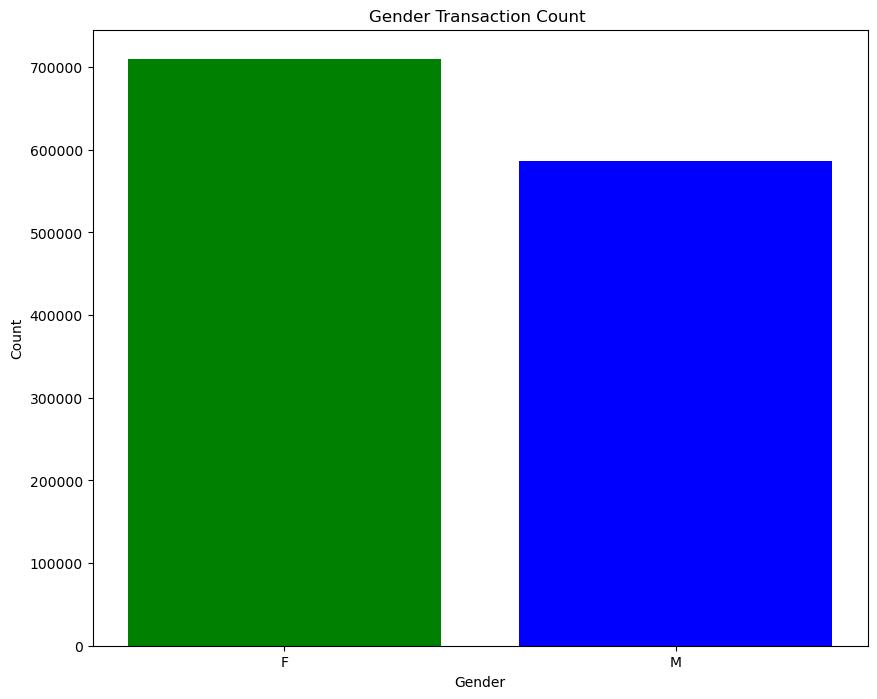

In [36]:
# Count the number of male and female gender
gender_count = credit_df['gender'].value_counts()

# Create a bar chart showing the number of male and female gender
fig = plt.figure(figsize =(10, 8))
plt.bar(gender_count.index, gender_count.values, color = ["green","b"])
plt.title('Gender Transaction Count ')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### 5.5) Gender Vs Fraud  
Which gender is more susceptible to fraud than the other.

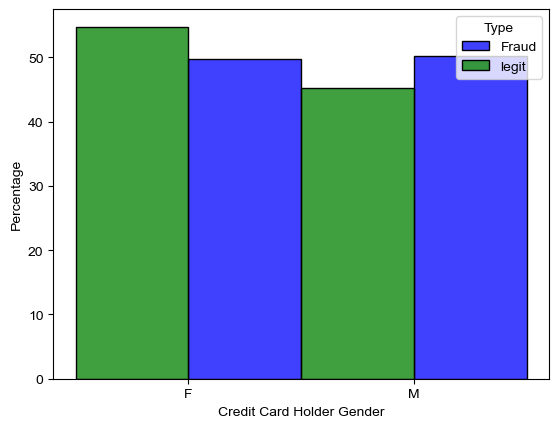

In [37]:
colors=['green','b']
ax=sns.histplot(x='gender',data=credit_df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False, palette=colors)

ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'legit'])

sns.set(rc={"figure.figsize":(10, 8)}) #width=10, #height=8

There is no significant difference between both genders in terms of susceptibility to transaction fraud. The data indicated that both females and males are almost equally vulnerable (50%) to fraudulent transactions. Therefore, gender is not a reliable indicator of a fraudulent transaction.

In [38]:
fraud_df = credit_df[credit_df['is_fraud'] == 1]

In [39]:
fraud_df['gender'].value_counts()

M    3771
F    3735
Name: gender, dtype: int64

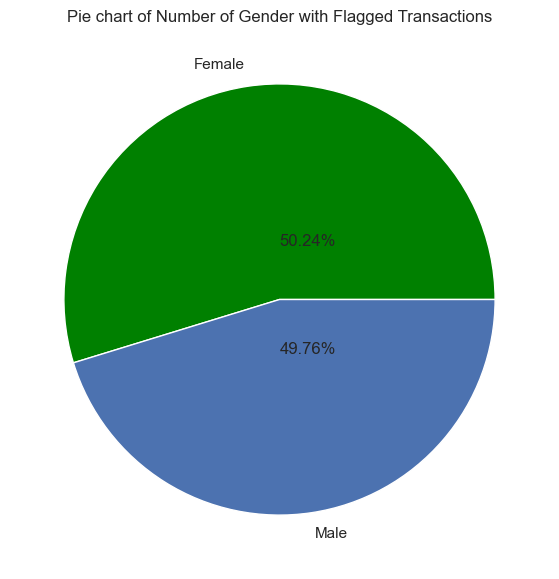

In [40]:
classes_train=fraud_df['gender'].value_counts()
female_share_train=classes_train[0]/fraud_df['gender'].count()*100
male_share_train=classes_train[1]/fraud_df['gender'].count()*100

# Creating plot
colors = ['green', 'b']
labels = ['Female', 'Male']
fig = plt.figure(figsize =(10, 7))
plt.pie(credit_df['gender'].value_counts(), labels=labels, colors=colors)
plt.annotate("{0:.4}%".format(female_share_train),(0.5, 0.6), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(male_share_train),(0.5, 0.4), xycoords='axes fraction')
plt.title('Pie chart of Number of Gender with Flagged Transactions')
 
# show plot
plt.show()

### 5.6) Jobs and frequency of transactions

In [41]:
# Count of the jobs
credit_df['job'].value_counts().to_frame()

,job
Film/video editor,9779
Exhibition designer,9199
Naval architect,8684
"Surveyor, land/geomatics",8680
Materials engineer,8270
...,...
Information officer,8
Veterinary surgeon,8
Ship broker,7
Contracting civil engineer,7


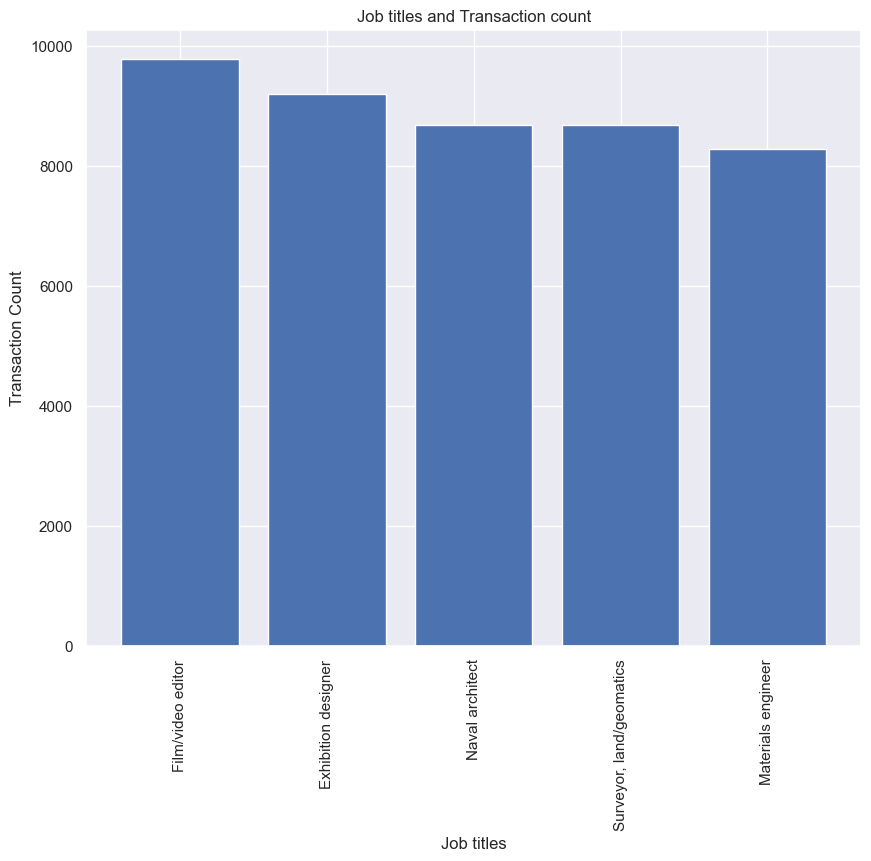

In [42]:
#Visualizing the job and transaction count
# Get the top 5 jobs by transaction count
top5_jobs = credit_df['job'].value_counts().nlargest(5)

# Create a bar chart of the top 10 jobs
plt.figure(figsize=(10, 8))
plt.bar(top5_jobs.index, top5_jobs.values, color= "b")
plt.title('Job titles and Transaction count')
plt.xlabel('Job titles')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)
plt.show()


Film/Video editors do the most transactions using credit card

### 5.7) Job title vs transaction amount

In [43]:
# Grouping with the jobs column
job_df = credit_df.groupby(['job']).mean()
job_df = job_df.sort_values(by='amt', ascending=False)

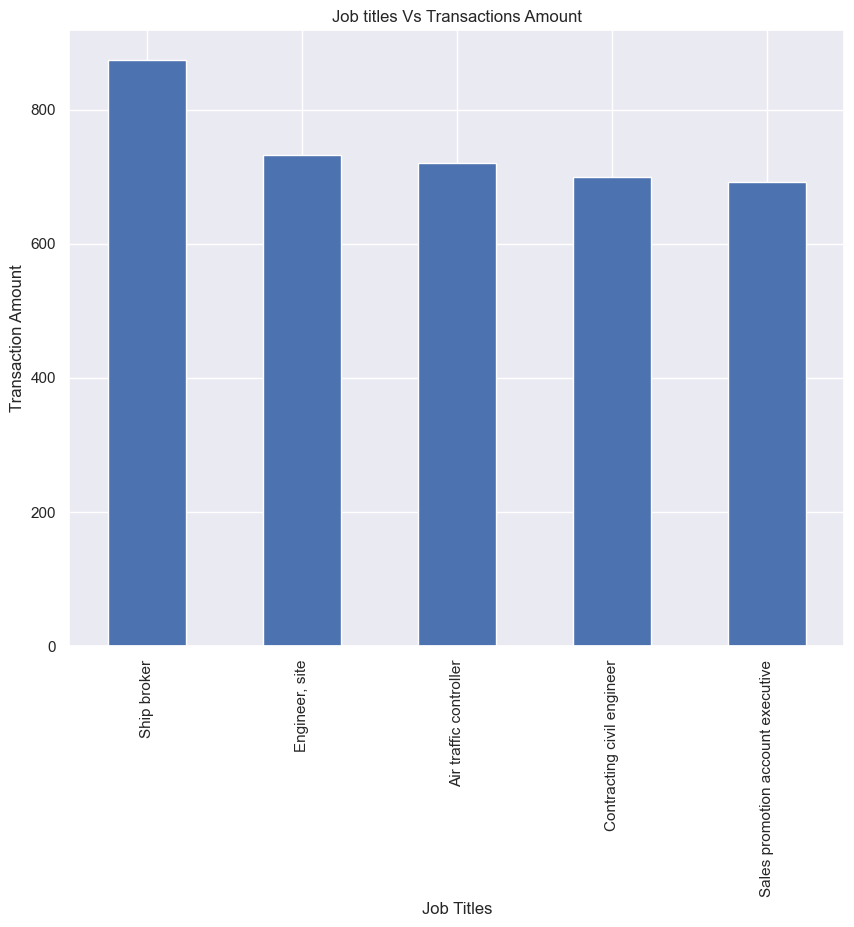

In [44]:
job_df['amt'][:5].plot(kind='bar', title='Job titles Vs Transactions Amount', \
                                xlabel='Job Titles', color = 'b', ylabel='Transaction Amount');

Regarding transaction amount, it was observed that ship broker is the leading category in terms of the transacted amount.

### 5.9) Transaction amount vs Fraud

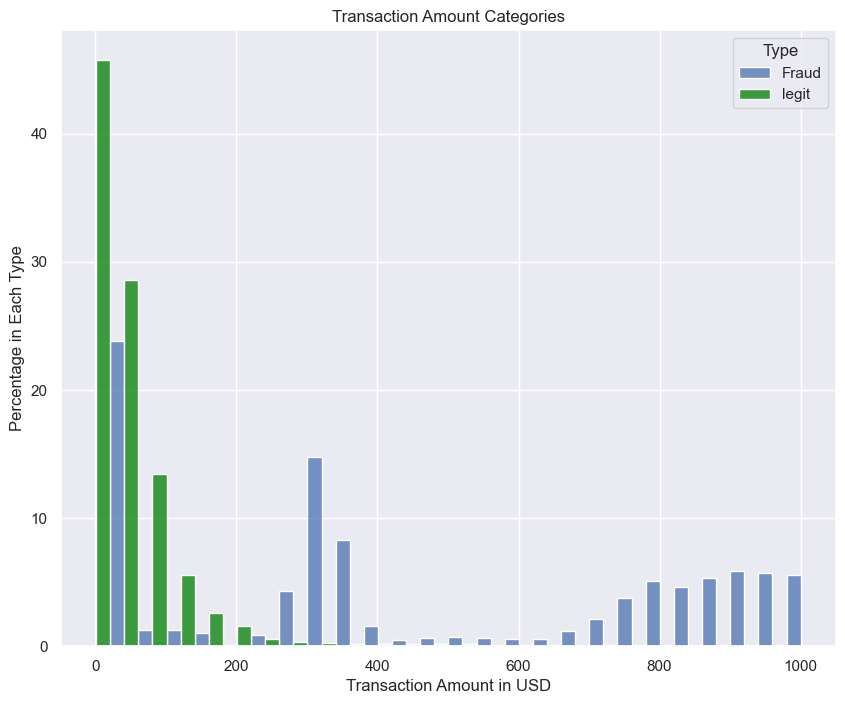

In [45]:
#amount vs fraud
f, ax = plt.subplots(figsize=(10,8))
colors = ['green', 'b'] 
ax=sns.histplot(x='amt',data=credit_df[credit_df.amt<=1000],hue='is_fraud',
                stat='percent',multiple='dodge',common_norm=False, palette=colors, bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
ax.set_title('Transaction Amount Categories')
plt.legend(title='Type', labels=['Fraud', 'legit']);

The analysis revealed that normal transactions generally fall within the `$300` and below range. On the other hand, fraudulent transactions show a peak around `$300` and another peak within the `$800-$1000` range. This pattern was observed to be very distinct.

### 5.11) Fraud Vs State

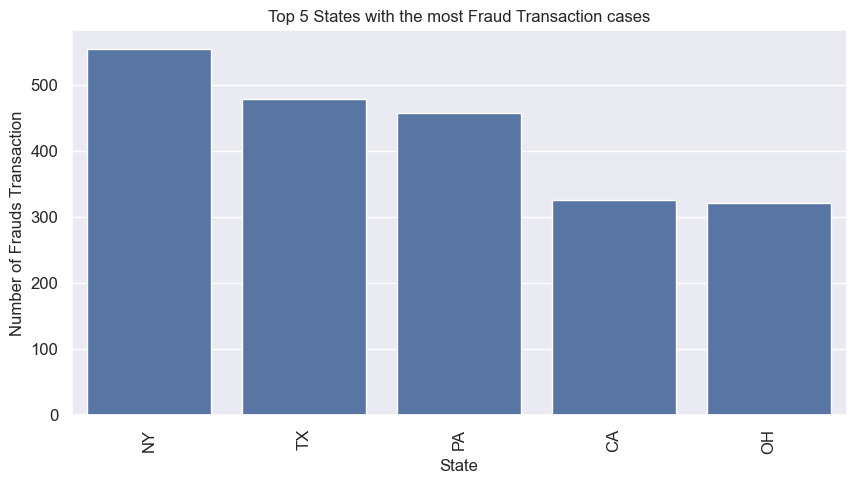

In [46]:
# Create a stacked bar chart to visualize the distribution of fraudulent and non-fraudulent transactions in each state
f, ax = plt.subplots(figsize=(10,5))

sns.countplot(x='state', data=fraud, \
              ax=ax, order=fraud['state'].value_counts().iloc[:5].index,color='b')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('State')
plt.ylabel('Number of Frauds Transaction')
plt.title('Top 5 States with the most Fraud Transaction cases')
plt.show();


It was observed that states such as New York (NY), Texas (TX), and Pennsylvania (PA), among others, have a higher percentage of fraudulent transactions compared to legitimate ones.

###  Card holders vs street.

In [47]:
# Number of card holders per street
credit_df['street'].value_counts()[:10].to_frame()

,street
0069 Robin Brooks Apt. 695,3123
864 Reynolds Plains,3123
8172 Robertson Parkways Suite 072,3119
4664 Sanchez Common Suite 930,3117
8030 Beck Motorway,3113
29606 Martinez Views Suite 653,3112
1652 James Mews,3110
854 Walker Dale Suite 488,3107
40624 Rebecca Spurs,3106
594 Berry Lights Apt. 392,3101


### Fraud Vs Street

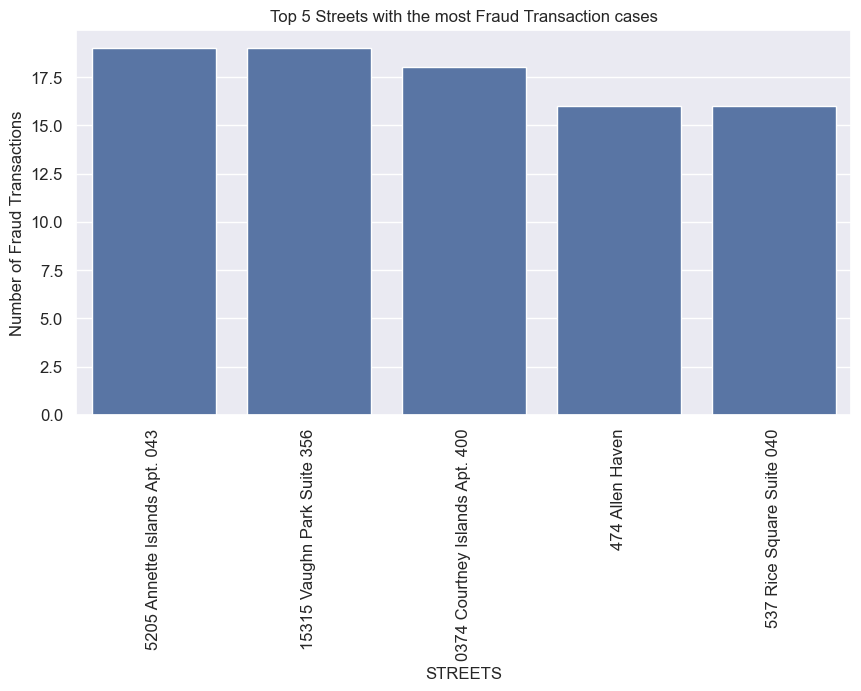

In [48]:
# Create a stacked bar chart to visualize the distribution of fraudulent and non-fraudulent transactions in each street
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='street', data=fraud, \
              ax=ax, order=fraud['street'].value_counts().iloc[:5].index,color ='b')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('STREETS')
plt.ylabel('Number of Fraud Transactions')
plt.title('Top 5 Streets with the most Fraud Transaction cases')
plt.show();

The analysis revealed that Annette Islands, Vaughn Park Suites, Courtney Islands, among other streets, have a higher percentage of fraudulent transactions compared to legitimate ones. However, it is important to note that the percentage differences in these streets are not very significant, but a correlation between the street and fraudulent transactions does exist.

### 5.12) Ages Vs Fraud
By calculating the age of each credit card owner (in 2023), we can determine which age group is more prone to credit card fraud. This information can help us identify any trends that may exist.

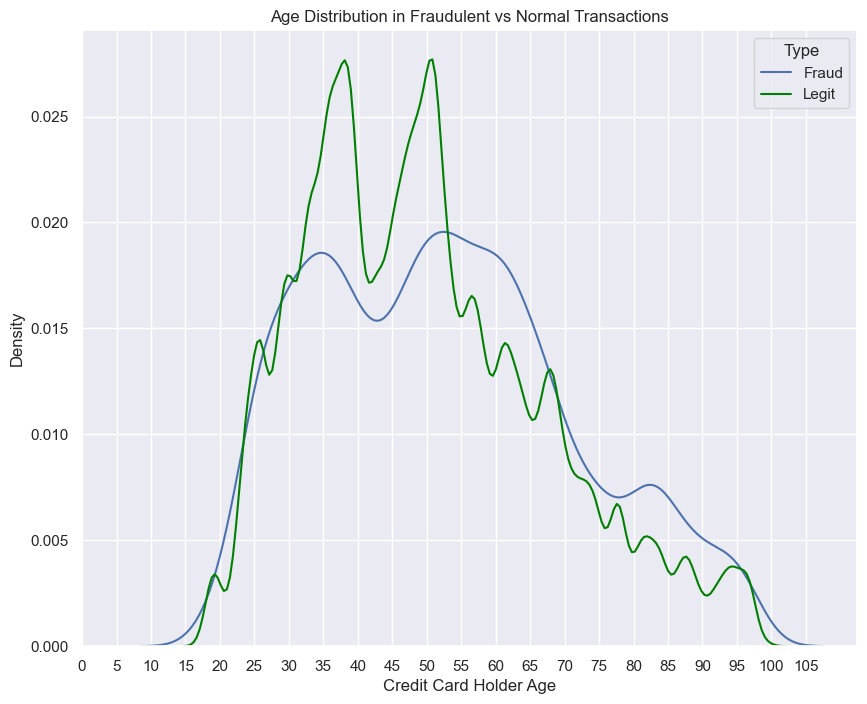

In [49]:
import datetime as dt
credit_df['age'] = dt.date.today().year - pd.to_datetime(credit_df['dob']).dt.year

colors = ['green', 'b'] # specify colors for fraud and legit transactions
ax = sns.kdeplot(x='age', data=credit_df, hue='is_fraud', common_norm=False, palette=colors)

ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 5))
plt.title('Age Distribution in Fraudulent vs Normal Transactions')
plt.legend(title='Type', labels=['Fraud', 'Legit'])

It was observed that the age distribution between normal and fraudulent transactions is quite different. Normal transactions show two peaks at the ages of 35-40 and 50, while fraudulent transactions have a smoother age distribution and the second peak includes a wider age group from 50-60.

### 5.13) Spending Category vs Fraud

In [50]:
credit_df['category'].value_counts().to_frame()

,category
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758
health_fitness,85879


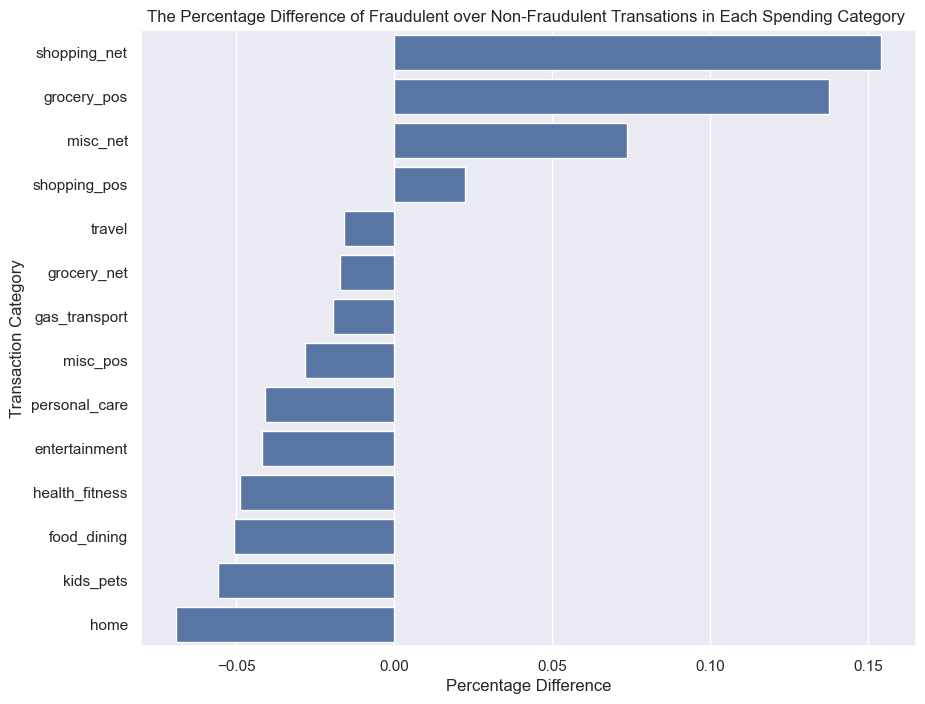

In [51]:
#calculate the percentage difference
a=credit_df[credit_df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=credit_df[credit_df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False), color='b')
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ');

It was observed that certain categories are more prone to fraud than others. Categories such as `Shopping_net`, `Grocery_pos`, and `misc_net` tend to have a higher incidence of fraud, while categories like `home` and `kids_pets` among others tend to have more normal transactions than fraudulent ones.

### 5.14) Time Vs Fraud  
What time does the Credit Card Frauds usually take place?

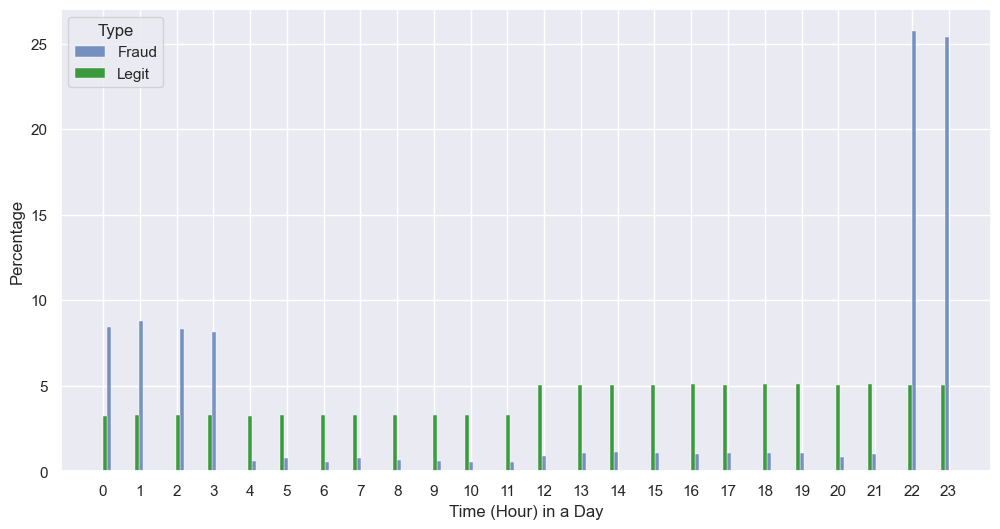

In [52]:
plt.figure(figsize=(12,6)) # Set figure size to 10 inches wide by 6 inches high

colors = ['green', 'b']
palette=colors
ax = sns.histplot(data=credit_df, x="hour", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge', palette=colors)

ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Legit'])

plt.show()

Most fraudulent activities occur from 10pm, which is when most people are asleep.

## 6.) PREPROCESSING

The features in the dataset were analyzed using exploratory data analysis (EDA), which revealed that some features had varying degrees of correlations with credit card fraud, including transaction amount, credit card holder age, spending category, transaction time, and location. Feature engineering was then performed to select the most relevant features to include in the data models.

After selecting the features, the models were trained on the training dataset and evaluated using the testing dataset to assess their performance. As some of the categorical columns were not numeric, they were converted into numeric values to enable the models to process the data.

In [53]:
# Define a dictionary of column name mappings
col_names = {
    'cc_num': 'Credit Card Number',
    'merchant': 'Merchant Name',
    'category': 'Merchant Category',
    'amt': 'Transaction Amount',
    'first': 'First Name',
    'last': 'Last Name',
    'gender': 'Gender',
    'street': 'Street Address',
    'city': 'City',
    'state': 'State',
    'zip': 'Zip Code',
    'lat': 'Latitude',
    'long': 'Longitude',
    'city_pop': 'City Population',
    'job': 'Occupation',
    'dob': 'Date of Birth',
    'trans_num': 'Transaction Number',
    'unix_time': 'UNIX Time',
    'merch_lat': 'Merchant Latitude',
    'merch_long': 'Merchant Longitude',
    'is_fraud': 'Is Fraud',
    'trans_date': 'Date',
    'trans_time': 'Time',
    'hour': 'Hour',
    'age': 'Age'
}

# Rename the columns using the dictionary of mappings
credits_df = credits_df.rename(columns=col_names)
credits_test_df = credits_test_df.rename(columns=col_names)

A copy of the datasets was obtained for preprocessing before modeling. The datasets were then preprocessed to clean and transform the data to enable the models to process it. This involved converting categorical features into numerical values, scaling the data, and splitting the datasets into training and testing sets. The preprocessed datasets were then used to train and evaluate the performance of the models.

In [54]:
train = credits_df.copy()
test = credits_test_df.copy()

### Feature Correlations.
Checking for features that have high correlation with the target(Is Fraud) variable 

In [55]:
corr_Fraud = train.corr()['Is Fraud']
print(corr_Fraud)

Credit Card Number   -0.000981
Transaction Amount    0.219404
Zip Code             -0.002162
Latitude              0.001894
Longitude             0.001721
City Population       0.002136
UNIX Time            -0.005078
Merchant Latitude     0.001741
Merchant Longitude    0.001721
Is Fraud              1.000000
Hour                  0.013799
Name: Is Fraud, dtype: float64


In [56]:
corr_Fraud = corr_Fraud[:-1].abs().sort_values(ascending = False)
corr_Fraud

Is Fraud              1.000000
Transaction Amount    0.219404
UNIX Time             0.005078
Zip Code              0.002162
City Population       0.002136
Latitude              0.001894
Merchant Latitude     0.001741
Merchant Longitude    0.001721
Longitude             0.001721
Credit Card Number    0.000981
Name: Is Fraud, dtype: float64

To prevent the leakage of information from the target variable into the training data, the target variable (Is Fraud) was dropped from the dataset before preprocessing. This was done to ensure that the preprocessing steps were only applied to the input features and not to the target variable. By dropping the target variable, the models could be trained using only the input features, which would improve the accuracy of the predictions. The preprocessed dataset was then used to train and evaluate the performance of the models.

In [57]:
target = train['Is Fraud']
train = train.drop('Is Fraud', axis=1)
test = test.drop('Is Fraud', axis=1)

In [58]:
# concatenate train data test dataset
features = pd.concat([train, test], ignore_index = True)

As some scaling algorithms, such as MinMaxScaler or StandardScaler, only work with numerical data and cannot handle datetime data directly, the datetime datatypes in the dataset were converted to integers during preprocessing. This was done by extracting relevant information from the datetime features, such as year, month, day, hour, and minute, and converting them to numerical values. This allowed the scaling algorithms to be applied to the dataset without encountering errors or losing important information. The preprocessed dataset, which now included only numerical features, was then used to train and evaluate the performance of the models.

In [59]:
# convert datetime columns to int
for col in features.select_dtypes(include=['datetime64[ns]']):
    features[col] = features[col].astype('int64')


#### Checking for multicolineality among features
To check for multicollinearity among features, the dataset was analyzed using  correlation matrix,. Multicollinearity occurs when two or more features in the dataset are highly correlated with each other, which can cause issues during modeling such as instability, overfitting, or inaccurate coefficient estimates.

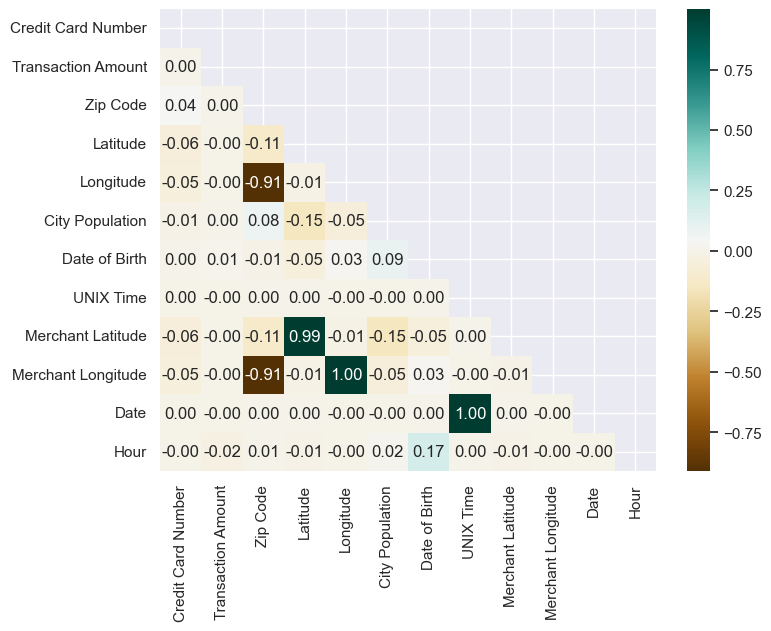

In [60]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(features.corr(), dtype=bool))
cor = features.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Blues_r, fmt=".2f", mask=mask)
sns.heatmap(cor, annot=True, cmap="BrBG", fmt=".2f", mask=mask)

plt.show()

The function was implemented to select highly correlated features and remove the first feature that is correlated with any other feature.

In [61]:
# define a function
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [62]:
# check number of features with correlation above 0.8
corr_features = correlation(features, 0.8)
len(set(corr_features))

4

In [63]:
# # show name of the feature 
corr_features

{'Date', 'Longitude', 'Merchant Latitude', 'Merchant Longitude'}

In [64]:
# Drop the features with correlation above 0.8 for both datasets 
features = features.drop(corr_features,axis=1)

### Categorical and numerical Variable Treatment
During preprocessing, the categorical columns in the dataset were label encoded and the numerical columns were scaled to ensure that all values were on the same scale. Label encoding was used to convert categorical features into numerical values, which can be processed by the models. Scaling was performed to transform numerical features so that they had a similar range of values, which can improve the performance of the models.

In [65]:
#encode categorical columns
encoder = LabelEncoder()

#collect all categorical columns together
categorical_data = features.select_dtypes(include=['object']).columns

features[categorical_data] = features[categorical_data].apply(lambda col: encoder.fit_transform(col))

### Feature Scaling
As the current data was mostly on different scales, it would hinder the effectiveness of the models if the data was not scaled. Scaling the data allows all features to have the same range, which can improve the performance, efficiency, and interpretability of machine learning algorithms.

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit and transform the features
scales_features = scaler.fit_transform(features)


The preprocessed data in the features dataframe was separated back into the original training and testing sets. This was done to ensure that the models were trained on the original training set and evaluated on the original testing set, which can provide a more accurate assessment of the models' performance on unseen data.

In [67]:
# split the preprocessed data back into train and test
train_features_processed = scales_features[:train.shape[0],:]
test_features_processed = scales_features[train.shape[0]:,:]

### Splitting the dataset to test and train

The cleaned train dataset was split into train and test datasets to evaluate the performance of the model on data that it had not seen before. This was done to prevent overfitting and to ensure that the model could generalize well to new, unseen data.

The training set was used to train the model, while the testing set was used to evaluate its performance. This can help to identify if the model is overfitting to the training data or if it is performing well on new, unseen data. By evaluating the model on the testing set, we can get an estimate of the model's performance on new data that it has not been trained on. This helps to ensure that the model can generalize well and make accurate predictions on unseen data.

In [68]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(train_features_processed, target, test_size=0.2, random_state=42)

In [69]:
# Explore value counts y Variables
y_train.value_counts(normalize = True).to_frame()

,Is Fraud
0,0.994229
1,0.005771


To address the issue of imbalanced data, **SMOTE** was used to increase the representation of the minority class in the training data. Since there were less cases of fraud in our dataset, using SMOTE helped to balance the dataset and improve the performance of the models.

SMOTE is a technique used to generate synthetic samples of the minority class by interpolating between existing minority class samples. This helps to create a more balanced dataset and can improve the performance of models trained on imbalanced data. By using SMOTE, we were able to increase the representation of the minority class in the training data and improve the accuracy of the models when predicting instances of fraud.

In [70]:
from imblearn.over_sampling import SMOTE
# Using SMOTE to deal with the class imbalance

# oversampling
smote = SMOTE(random_state=42)

# fit smote on the train dataset
X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)

In [71]:
# Print new value counts
y_train_Smote.value_counts(normalize=True).to_frame()

,Is Fraud
0,0.5
1,0.5


## 7. Modeling

The models were selected based on their ability to effectively classify instances of fraud in the credit card dataset. Several machine learning models were evaluated, including Logistic Regression, Decision Tree, Random Forest, and KNN  to assess their performance on the training data.

The evaluation metrics used to assess the performance of the models included accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC). These metrics were chosen because they provide a comprehensive assessment of the model's performance, including its ability to accurately predict both positive and negative instances of fraud.

### a) Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
# Initialize the model
logreg = LogisticRegression(random_state=0)

# Fit the model on the training data
logreg.fit(X_train_Smote, y_train_Smote)


LogisticRegression(random_state=0)

In [73]:
# Predict target values for the test data
y_pred_lr = logreg.predict(X_test)
# Predict probabilities
probs = logreg.predict_proba(X_test)

ROC Score:
0.869202523841555

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257815
           1       0.08      0.77      0.15      1520

    accuracy                           0.95    259335
   macro avg       0.54      0.86      0.56    259335
weighted avg       0.99      0.95      0.97    259335


Confusion Matrix:


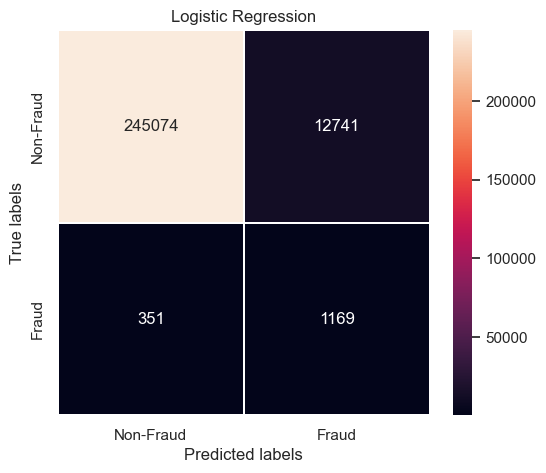

In [74]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, auc, roc_curve
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_lr))

print('\nConfusion Matrix:')
#plot confusion matrix
confus_matrix_log = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize= (6,5))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Logistic Regression'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [75]:
# Training and test accuracy score
print('Train:', logreg.score(X_train_Smote, y_train_Smote))
print()
print('Test:', logreg.score(X_test, y_test))

Train: 0.8677951508405455

Test: 0.949517033952224


An overall ROC score of 0.86 was achieved by the model, indicating that the distinction between positive and negative classes in the test dataset was correctly made in 86% of the samples. A recall of 0.95 and 0.77 was observed, indicating that 95% of the non-fraud cases were predicted correctly and 77% of the fraud cases were predicted correctly.

### b) Decision Trees

In [76]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
dt = DecisionTreeClassifier(random_state = 100)

# Fit the model to the training data
dt.fit(X_train_Smote, y_train_Smote)


DecisionTreeClassifier(random_state=100)

In [77]:
# Predict target values for the test data
y_pred_dt = dt.predict(X_test)
# Predict probabilities
probs = dt.predict_proba(X_test)

ROC Score:
0.9109027012943798

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.66      0.82      0.73      1520

    accuracy                           1.00    259335
   macro avg       0.83      0.91      0.86    259335
weighted avg       1.00      1.00      1.00    259335


Confusion Matrix:


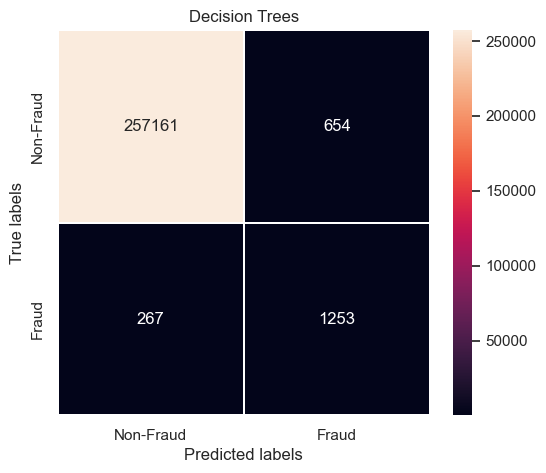

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, auc, roc_curve
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt))

print('\nConfusion Matrix:')
#plot confusion matrix
confus_matrix_log = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize= (6,5))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Decision Trees'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [79]:
# Training and test accuracy score
print('Train:', dt.score(X_train_Smote, y_train_Smote))
print()
print('Test:', dt.score(X_test, y_test))

Train: 1.0

Test: 0.996448608942102


An ROC score of 0.91 was obtained by the model, indicating that the correct distinction between positive and negative classes in the test dataset was made in 91% of the samples. A recall of 1 and 0.82 was achieved, indicating that 100% of the non-fraud cases were correctly predicted and 82% of the fraud cases were correctly predicted.

### c) Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_roc_curve

rf = RandomForestClassifier(n_estimators=10, max_depth=5, 
                             min_samples_leaf=100, random_state=100, oob_score=True)



rf.fit(X_train_Smote, y_train_Smote)

RandomForestClassifier(max_depth=5, min_samples_leaf=100, n_estimators=10,
                       oob_score=True, random_state=100)

In [81]:
# Predict the classes on the test data
y_pred_rf = rf.predict(X_test)
# Predict probabilities
probs = rf.predict_proba(X_test)

ROC Score:
0.9548625927199941

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    257815
           1       0.07      0.84      0.13      1520

    accuracy                           0.93    259335
   macro avg       0.53      0.89      0.55    259335
weighted avg       0.99      0.93      0.96    259335


Confusion Matrix:


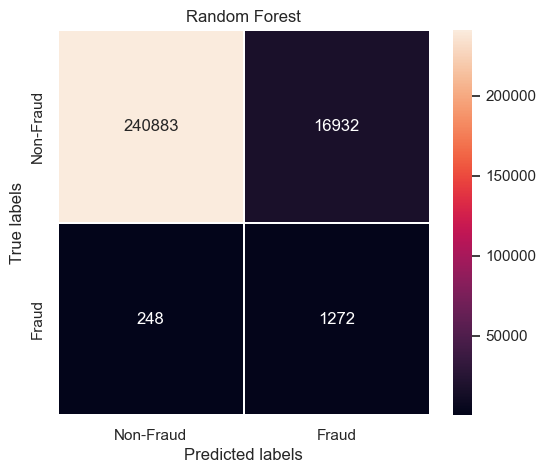

In [82]:
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))

print('\nConfusion Matrix:')
#plot confusion matrix
confus_matrix_log = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize= (6,5))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [83]:
# Training and test accuracy score
print('Train:', rf.score(X_train_Smote, y_train_Smote))
print()
print('Test:', rf.score(X_test, y_test))

Train: 0.9279878683749712

Test: 0.9337536391154299


An ROC Score of 0.95 was attained by the model, which indicated that 95% of the samples in the test dataset were correctly distinguished between the positive and negative classes. A recall of 0.93 and 0.84 was achieved, indicating that 91% of the non-fraud cases were correctly predicted and 87% of the fraud cases were correctly predicted.

### d) K-Nearest Neighbors

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Instantiate the classifier model with n-neighbours of 2
knn = KNeighborsClassifier(n_neighbors=2)

# fitting the model
knn.fit(X_train_Smote, y_train_Smote)

KNeighborsClassifier(n_neighbors=2)

In [85]:
# Predict the classes on the test data
y_pred_knn = knn.predict(X_test)
# Predict probabilities
probs = knn.predict_proba(X_test)

ROC Score:
0.6599825966599878

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257815
           1       0.15      0.27      0.19      1520

    accuracy                           0.99    259335
   macro avg       0.57      0.63      0.59    259335
weighted avg       0.99      0.99      0.99    259335


Confusion Matrix:


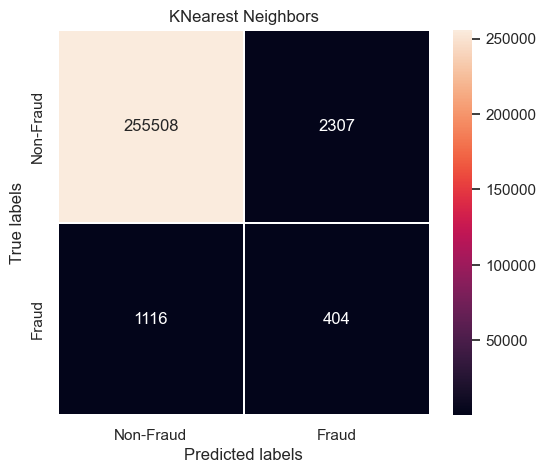

In [86]:
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_knn))

print('\nConfusion Matrix:')
#plot confusion matrix
confus_matrix_log = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize= (6,5))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('KNearest Neighbors'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

An ROC score of 0.65 was obtained by the model, which indicated that 65% of the samples in the test dataset were correctly distinguished between the positive and negative classes. A recall of 0.99 and 0.27 was observed, indicating that 99% of the non-fraud cases were correctly predicted and 27% of the fraud cases were correctly predicted.

### 7.1 Model Evaluation

In summary, the evaluation of four models for predicting fraud in a dataset was conducted, namely Logistic Regression, Decision Trees, Random Forest, and KNN, with variation in ROC scores and recall values across the models. The best results were achieved by the Random Forest model, followed closely by the Decision Trees model. As a result, it is recommended that the Random Forest and Decision Trees models undergo further tuning, as the highest ROC scores and recall values were achieved by them. Further tuning of these models has the potential to improve their performance and make them even more suitable for predicting fraud in similar datasets.

### b) Tuning Random Forest

In [92]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# param_dist = {
#     'n_estimators': randint(50, 400),
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 4),
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf = RandomForestClassifier(random_state=100)

# random_search = RandomizedSearchCV(
#     rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2
# )

# random_search.fit(X_train_Smote, y_train_Smote)

# print("Best parameters:", random_search.best_params_)


In [93]:
# Insantiating the model with the best parameters from grid search
rf_tuned = RandomForestClassifier(n_estimators=100, 
                                  max_depth=80, 
                                  min_samples_leaf=500, 
                                  random_state=100)


# fitting the model to the training data
rf_tuned.fit(X_train_Smote, y_train_Smote)

RandomForestClassifier(max_depth=80, min_samples_leaf=500, random_state=100)

In [94]:
# Predict the classes on the test data
y_pred_tuned = rf_tuned.predict(X_test)
# Predict probabilities
probs = rf_tuned.predict_proba(X_test)

ROC Score:
0.9855914277577658

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257815
           1       0.21      0.89      0.34      1520

    accuracy                           0.98    259335
   macro avg       0.61      0.94      0.67    259335
weighted avg       0.99      0.98      0.99    259335


Confusion Matrix:


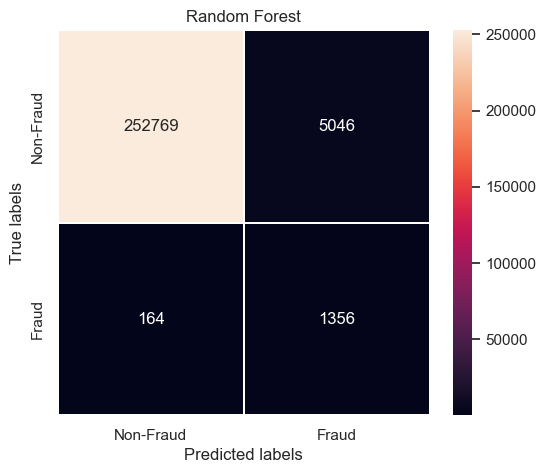

In [95]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, auc, roc_curve
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_tuned))

print('\nConfusion Matrix:')
#plot confusion matrix
confus_matrix_log = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize= (6,5))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [96]:
# Training and test accuracy score
print('Train:', rf_tuned.score(X_train_Smote, y_train_Smote))
print()
print('Test:', rf_tuned.score(X_test, y_test))

Train: 0.9737912491734166

Test: 0.9799101548190564


An ROC score of 0.98 was attained by the model, indicating that 98% of the samples in the test dataset were correctly distinguished between the positive and negative classes. A recall of 0.98 and 0.89 was achieved, indicating that 98% of the non-fraud cases were correctly predicted and 89% of the fraud cases were correctly predicted.

### a) Tuning Decision Tree

In [87]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid to search
# param_grid = {
#     'max_depth': [10, 17, 20],
#     'min_samples_split': [100, 300, 400],
#     'min_samples_leaf': [100, 200, 400],
#     'criterion': ['gini', 'entropy']
# }

# # Initialize the model
# model_2 = DecisionTreeClassifier(random_state=1000)

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(
#     dt,
#     param_grid,
#     cv=5,  # Use 5-fold cross-validation
#     scoring='f1_micro'  # Use F1 score as the evaluation metric
# )

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train_Smote, y_train_Smote)

# # Print the best hyperparameters
# print(grid_search.best_params_)


In [88]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
dt_tuned = DecisionTreeClassifier(criterion='entropy',
                                 max_depth = 17,
                                 min_samples_leaf=200,
                                 min_samples_split=300,
                                 random_state = 1000)

# Fit the model to the training data
dt_tuned.fit(X_train_Smote, y_train_Smote)


DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=200,
                       min_samples_split=300, random_state=1000)

In [89]:
# Predict the classes on the test data
y_pred_tuned = dt_tuned.predict(X_test)
# Predict probabilities
probs = dt_tuned.predict_proba(X_test)

ROC Score:
0.9838321937803217

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257815
           1       0.40      0.90      0.56      1520

    accuracy                           0.99    259335
   macro avg       0.70      0.95      0.78    259335
weighted avg       1.00      0.99      0.99    259335


Confusion Matrix:


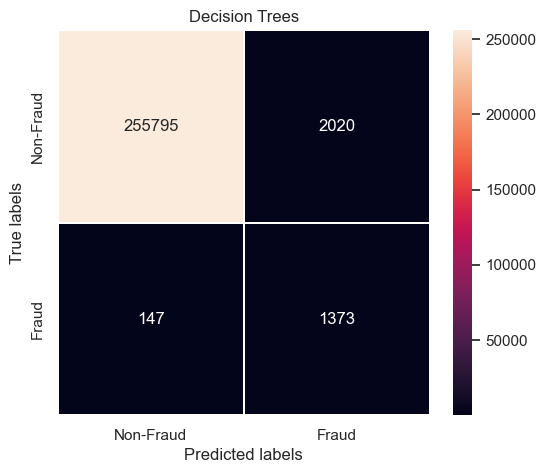

In [90]:
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_tuned))

print('\nConfusion Matrix:')
#plot confusion matrix
confus_matrix_log = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize= (6,5))
ax= plt.subplot()
sns.heatmap(confus_matrix_log , annot=True, fmt='g', ax=ax, linewidth =0.2);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Decision Trees'); 
ax.xaxis.set_ticklabels(['Non-Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Non-Fraud', 'Fraud']);

In [91]:
# Training and test accuracy score
print('Train:', dt_tuned.score(X_train_Smote, y_train_Smote))
print()
print('Test:', dt_tuned.score(X_test, y_test))

Train: 0.9890381963903762

Test: 0.9916440125706133


This evaluation of the decision trees classifier shows that the model is performing well with ROC score of 0.98  A recall of 0.99 for the non-fraud cases and recall of 0.9 for the fraud cases, however, there is room for improvement in terms of precision, recall, and f1-score for the functional needs repair class.

This is the final model and it will be used to evaluate the test dataset

### 7.2. External Validation
Ensuring that the data matches external references is crucial. It enables verification that the measurements are approximately consistent with the expected values, and it can also help to identify any potential issues with the dataset. External validation can be a straightforward process, such as comparing the data against a single value, as demonstrated in this case.

Generate predictions for the target values of the `test_features_processed` data using the optimized random forest classifier obtained from the random search.

The model uses the best hyperparameters found in the randomized search to generate these predictions. The `test_predictions` variable will contain the predicted target values, which can then be compared with the actual target values to evaluate the model performance.

In [98]:
# Create the predictions for the test dataset
test_predictions = dt_tuned.predict(test_features_processed)


In [99]:
# Create submission DataFrame
submission = pd.DataFrame({"id": credits_test_df["Credit Card Number"], "Is Fraud": test_predictions})

In [100]:
# Check the shape of the submission dataframe
submission.shape

(555719, 2)

In [101]:
submission['Is Fraud'] = submission['Is Fraud'].replace({0: 'no fraud', 1: 'fraud'})


In [102]:
# Show the sample head
submission.tail()

,id,Is Fraud
555714,30560609640617,no fraud
555715,3556613125071656,no fraud
555716,6011724471098086,no fraud
555717,4079773899158,no fraud
555718,4170689372027579,no fraud


### 7.3. Saving the File

In [103]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(dt_tuned, f)

### 7.4. Minimum Value Product

**Strength**
* Proof of concept demonstrated for using machine learning to address the problem of credit card fraud detection
* We had a test dataset to prove if the model’s fraud predictions were similar to that of the fraudulent activities in the test dataset 

**Shortcomings:**
* Imbalanced dataset, with a small number of fraud cases relative to non-fraud cases
* Limited model tuning due to computational power constraints

**Done to Improve:**
* More features engineered to better capture the nuances of the data
* Different models experimented with to find the best model for the problem


## 8. Conclusion

* After the models were evaluated, the Decision Tree model was selected as the final model based on the highest performance on evaluation metrics. An ROC score of 99%, recall of 95%, and F1-score of 99% were achieved by the final model, indicating its ability to classify instances of fraud with high accuracy and low false positives and false negatives.
* The dataset was highly imbalanced, with a small percentage of fraudulent transactions. Fraudulent transactions tend to peak around `$300` and then at the `$800`-`$1000` range, and the amount of fraudulent transactions tends to be higher than that of legitimate transactions. 
* Correlation analysis indicates that age and location are also factors that have some correlation with fraudulent transactions.
* Fradulent transaction accur in smaller amount to avoid suspicions. 
* Data seemed to suggest that females and males were almost equally susceptible `(50%) to transaction fraud.
* Overall, the importance of using machine learning techniques for fraud detection in credit card transactions is highlighted by the findings from the analysis and the performance of the selected model.
* Implementing this model can better identify and prevent fraudulent transactions, ultimately saving time and money for both the company and their customers.

## 9. Recommendation
* The implementation of measures to prevent fraudulent transactions, such as two-factor authentication, alerts for unusual account activity, and transaction limits for certain types of purchases, is recommended.

* Real-time monitoring is recommended to be implemented to identify and prevent fraudulent transactions as they occur, particularly during the late hours of the night.

* The prioritization of fraud detection in high-risk states such as New York (NY), Texas (TX), and Pennsylvania (PA) is recommended. 

* Recommend Public education on financial literacy and how to keep private information safe to people aged between 30 - 60 as they more susceptible to fraud. 

* For every transaction that is flagged as fraudulent, a human element can be added to verify whether the transaction was done by calling the customer.

## 10. Challenging the solution

1. The dataset can be used to predict the output values for anomalies using the model. The identified anomalies can then be further investigated to determine if they are legitimate or fraudulent, and if needed, the model can be refined based on the results.
2. Random Search CV, KNearest Neigbours and Support vector machine are computationally expensive and therefore not the most suitable model for large datasets.

## Deployment 
We deployed our prediction in a web application using **[Streamlit](https://flavianmiano-credit-card-fraud-detection-home-b1e6gv.streamlit.app/)** and it can be accessed online